In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/preprocessing_data.csv")

emo_feature = []
emo_target = []

for i in range(len(df['emotion'])):
    if df['emotion'][i] == 1:
        emo_target.append(1)
    else:
        emo_target.append(0)
        
    emo_feature.append([df['mouth_distance'][i], df['average_distance'][i], df['eye_brows'][i], df['eye_size'][i]])

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# Add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

====================Fold 0==================== 

accuracy_score : 0.7566628041714948
log_loss : 0.52018460585737

====================Fold 1==================== 

accuracy_score : 0.7253765932792584
log_loss : 0.5649796515676415

====================Fold 2==================== 

accuracy_score : 0.7392815758980301
log_loss : 0.5306548878640391

====================Fold 3==================== 

accuracy_score : 0.7439165701042874
log_loss : 0.5344933807892175

====================Fold 4==================== 

accuracy_score : 0.7578215527230591
log_loss : 0.5123095468792311



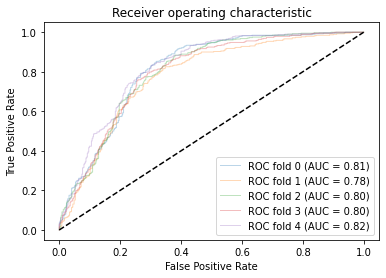

specificity: 0.7380073800738007
sensitivity: 0.7894736842105263
accuracy : 0.7604166666666666
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       271
           1       0.70      0.79      0.74       209

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.77      0.76      0.76       480

0.7604166666666666


C:\Users\thanapat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


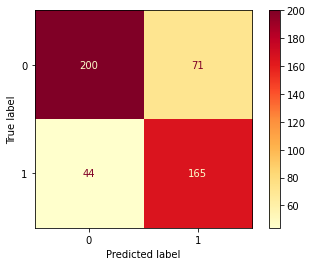

In [10]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='linear', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm_linear.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}")
print(f"sensitivity: {sensitivity}")
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\1_svm_linear_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.7424023154848046
log_loss : 0.5392306501551873

====================Fold 2==================== 

accuracy_score : 0.7713458755426917
log_loss : 0.5074032282774529

====================Fold 3==================== 

accuracy_score : 0.7260869565217392
log_loss : 0.5439999639965472

====================Fold 4==================== 

accuracy_score : 0.7507246376811594
log_loss : 0.5073281539653207

====================Fold 5==================== 

accuracy_score : 0.7246376811594203
log_loss : 0.5353374753046874



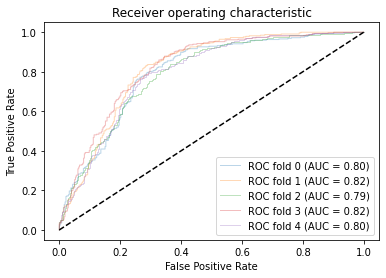

specificity: 0.6974169741697417
sensitivity: 0.8229665071770335
accuracy : 0.7520833333333333
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       271
           1       0.68      0.82      0.74       209

    accuracy                           0.75       480
   macro avg       0.76      0.76      0.75       480
weighted avg       0.77      0.75      0.75       480

0.7520833333333333


C:\Users\thanapat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


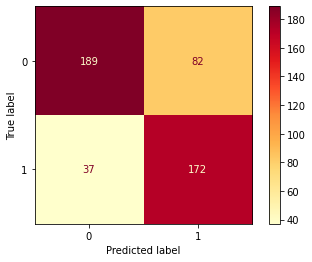

In [11]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='poly', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm_poly.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])
    
predict = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}")
print(f"sensitivity: {sensitivity}")
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\1_svm_poly_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.7576853526220615
log_loss : 0.5222864668605702

====================Fold 2==================== 

accuracy_score : 0.7486437613019892
log_loss : 0.5245521444961994

====================Fold 3==================== 

accuracy_score : 0.7663043478260869
log_loss : 0.5266362476968507

====================Fold 4==================== 

accuracy_score : 0.7391304347826086
log_loss : 0.5323842819954472

====================Fold 5==================== 

accuracy_score : 0.7336956521739131
log_loss : 0.545229046201279



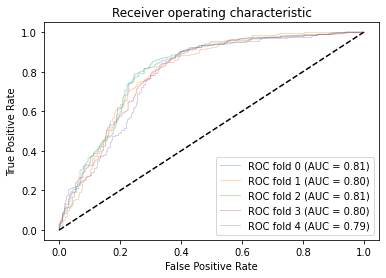

specificity: 0.7011070110701108
sensitivity: 0.8229665071770335
accuracy : 0.7541666666666667
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       271
           1       0.68      0.82      0.74       209

    accuracy                           0.75       480
   macro avg       0.76      0.76      0.75       480
weighted avg       0.77      0.75      0.76       480

0.7541666666666667


C:\Users\thanapat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


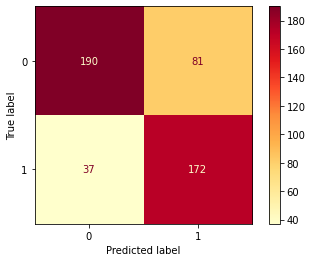

In [12]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='rbf', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm_rbf.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}")
print(f"sensitivity: {sensitivity}")
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\1_svm_rbf_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.753393665158371
log_loss : 0.5268779338382252

====================Fold 2==================== 

accuracy_score : 0.7805429864253394
log_loss : 0.49941461996220643

====================Fold 3==================== 

accuracy_score : 0.746606334841629
log_loss : 0.5296915312910926

====================Fold 4==================== 

accuracy_score : 0.7352941176470589
log_loss : 0.5391503598782078

====================Fold 5==================== 

accuracy_score : 0.7579185520361991
log_loss : 0.5205143125820274



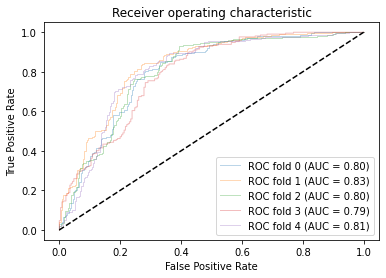

specificity: 0.6937269372693727
sensitivity: 0.8421052631578947
accuracy : 0.7583333333333333
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       271
           1       0.68      0.84      0.75       209

    accuracy                           0.76       480
   macro avg       0.77      0.77      0.76       480
weighted avg       0.78      0.76      0.76       480

0.7583333333333333


C:\Users\thanapat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


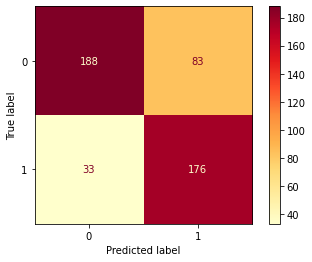

In [13]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}")
print(f"sensitivity: {sensitivity}")
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\1_svm_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.751412429378531
log_loss : 0.5423379582636768

====================Fold 2==================== 

accuracy_score : 0.7429378531073446
log_loss : 0.54282683580327

====================Fold 3==================== 

accuracy_score : 0.7570621468926554
log_loss : 0.5398758455956473

====================Fold 4==================== 

accuracy_score : 0.7620396600566572
log_loss : 0.4780359682784179

====================Fold 5==================== 

accuracy_score : 0.7507082152974505
log_loss : 0.5354767234425094



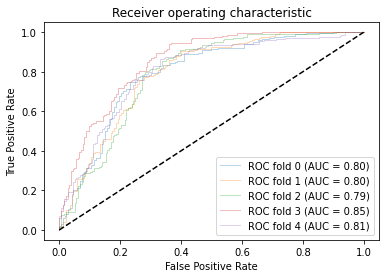

specificity: 0.7269372693726938
sensitivity: 0.7655502392344498
accuracy : 0.74375
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       271
           1       0.68      0.77      0.72       209

    accuracy                           0.74       480
   macro avg       0.74      0.75      0.74       480
weighted avg       0.75      0.74      0.74       480

0.74375


C:\Users\thanapat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


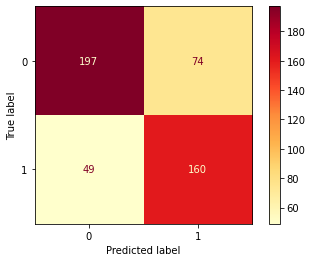

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = LogisticRegression()

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_logreg.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}")
print(f"sensitivity: {sensitivity}")
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\1_logreg_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.7067137809187279
log_loss : 0.9130334908964071

====================Fold 2==================== 

accuracy_score : 0.734982332155477
log_loss : 0.7373426482422479

====================Fold 3==================== 

accuracy_score : 0.7491166077738516
log_loss : 0.5816109436894599

====================Fold 4==================== 

accuracy_score : 0.7526501766784452
log_loss : 0.6525479509772936

====================Fold 5==================== 

accuracy_score : 0.7420494699646644
log_loss : 0.8053979238578707



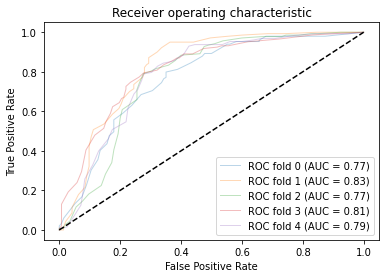

specificity: 0.7490774907749077
sensitivity: 0.8516746411483254
accuracy : 0.79375
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       271
           1       0.72      0.85      0.78       209

    accuracy                           0.79       480
   macro avg       0.80      0.80      0.79       480
weighted avg       0.80      0.79      0.79       480

0.79375


C:\Users\thanapat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


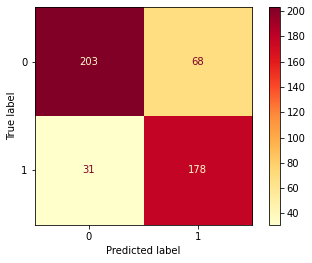

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# create model
clf = RandomForestClassifier(n_estimators=40)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_rf.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}")
print(f"sensitivity: {sensitivity}")
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\1_rf_matrix.jpg')

====================Fold 1==================== 

accuracy_score : 0.7973568281938326
log_loss : 0.5049611147808675

====================Fold 2==================== 

accuracy_score : 0.7533039647577092
log_loss : 0.540733247848962

====================Fold 3==================== 

accuracy_score : 0.7168141592920354
log_loss : 0.6137835185260158

====================Fold 4==================== 

accuracy_score : 0.7787610619469026
log_loss : 0.5042366423327717

====================Fold 5==================== 

accuracy_score : 0.7035398230088495
log_loss : 0.6112723128645171



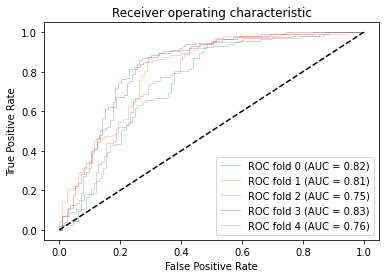

specificity: 0.7084870848708487
sensitivity: 0.8181818181818182
accuracy : 0.75625
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       271
           1       0.68      0.82      0.75       209

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.77      0.76      0.76       480

0.75625


C:\Users\thanapat\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


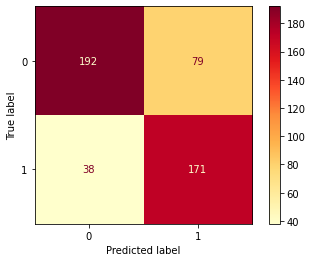

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# create model
clf = GaussianNB()

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_nb.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])
    
predict = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}")
print(f"sensitivity: {sensitivity}")
print(f"accuracy : {accuracy_score(y_test, predict)}")

# Report
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='YlOrRd')
plt.savefig('matrix\\1_nb_matrix.jpg')